## Загрузка данных

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()
import re
pd.options.display.float_format = '{:.2f}'.format

In [32]:
data = pd.read_excel(r'~\krassa\09.11.2023\Реестр требований.xlsx', sheet_name='20.41.31.130 Мыло жидкое')

In [33]:
data2 = pd.read_excel(r'~\krassa\09.11.2023\Реестр с 01.09.2023 44-ФЗ + поставщики.xlsx', sheet_name='44-ФЗ')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Дата                               546 non-null    datetime64[ns]
 1   Заказ №                            546 non-null    object        
 2   Ссылка                             546 non-null    object        
 3   ФЗ                                 214 non-null    float64       
 4   Монолот                            525 non-null    float64       
 5   № Спецификации п/п                 278 non-null    float64       
 6   Количество ед.                     544 non-null    float64       
 7   Цена (руб) за ед позиции           511 non-null    float64       
 8   Сумма по позиции (руб) за единицу  511 non-null    float64       
 9   Единица измерения                  536 non-null    object        
 10  Антибактериальный компонент        448

In [73]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5240 entries, 0 to 5239
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Дата публикации тендера                            5240 non-null   datetime64[ns]
 1   Заказ №                                            5240 non-null   int64         
 2   Источник информации                                5240 non-null   object        
 3   Способ размещения заказа                           5240 non-null   object        
 4   Этап размещения заказа                             5240 non-null   object        
 5   Регион проведения заказа                           5240 non-null   object        
 6   Окончание подачи заявок                            5240 non-null   datetime64[ns]
 7   Начальная цена Лота                                5240 non-null   float64       
 8   Количество Заказчи

<div class="alert alert-block alert-success">
    

**На текущий момент, заполняемый реестр требований состоит из 546 позиций закупаемого жидкого мыла и условий к ним. Первоначально предлагается изучить следующие вопросы:**

     1 Понять распределение закупок по количеству закупаемых товаров в категории "Жидкое мыло"
     
     2 Изучить состав этих закупок, определить количество монолотов по отношению к вышедшим тендерам.     
     
     3. Увидеть закономерности в требованиях, которые складываются по ходу заполнения реестра.
    
</div> 
    

## 1. Распределение закупок по количеству закупаемых товаров в категории "Жидкое мыло"

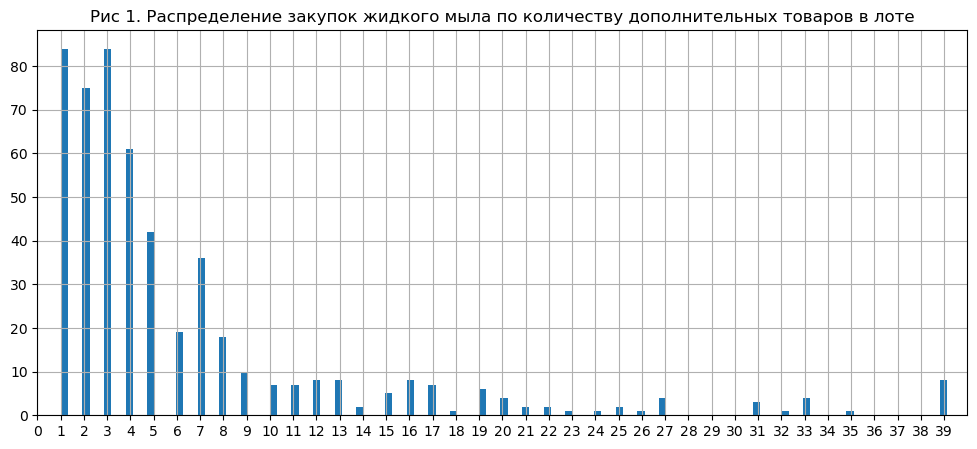

In [231]:
plt.figure(figsize=(12,5))

data['Монолот'].hist(bins=400)
plt.title('Рис 1. Распределение закупок жидкого мыла по количеству дополнительных товаров в лоте')
plt.xlim(0,40)
plt.xticks(np.arange(0, 40, step=1))


plt.show()

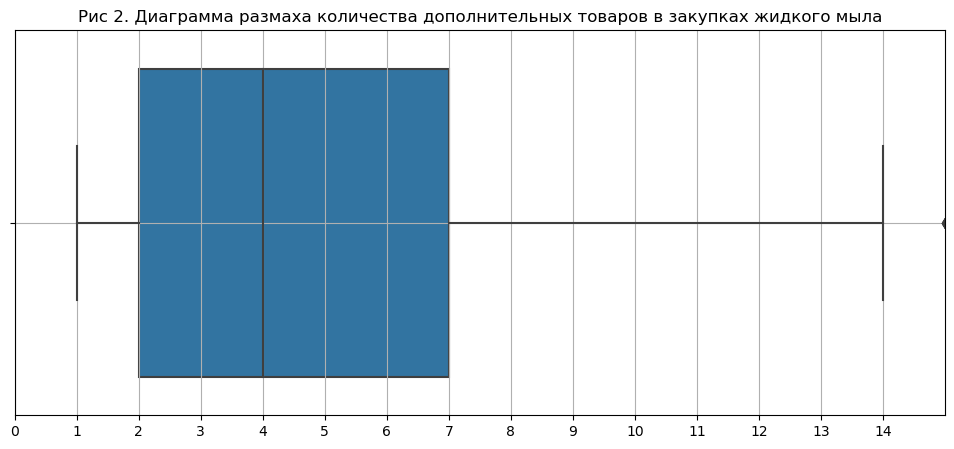

count   525.00
mean      6.84
std       9.40
min       1.00
25%       2.00
50%       4.00
75%       7.00
max     125.00
Name: Монолот, dtype: float64


In [230]:
plt.figure(figsize=(12,5))
boxplot = sns.boxplot(x=data['Монолот'].values)
plt.xlim(0,15)
plt.xticks(np.arange(0, 15, step=1))
plt.grid(True)
plt.title('Рис 2. Диаграмма размаха количества дополнительных товаров в закупках жидкого мыла')
plt.show()

print(data['Монолот'].describe())



<div class="alert alert-block alert-success">
    
**Наиболее широко представлены тендеры с 1, 2, 3 лотами. Присутствует большое количество закупок одного вида жидкого мыла в зависимости от заказчика, однако закупки с несколькими дополнительными товарами необходимо изучить на случай, если среди них будут тендеры где все позиции представлены жидким мылом разного качества (рис 1.). На рисунке 2 показано, что 50% закупок составляют тендеры с 1-4 дополнительных товарами, их целесообразно изучить для самостоятельного участия. Группы 5-7 (25%) и 8 и более (25%) целесообразно изучить с целью установления партнерских отношений с поставщиками.**
</div>
    
---

## 2. Состав закупок жидкого мыла

In [111]:
def clear_text(text):
    text = re.sub(r'\D', ' ', text)
    return int(" ".join(text.split()))

In [112]:
data2['Заказ №'] = data2['Заказ №'].astype('str').progress_apply(clear_text)
data['Заказ №'] = data['Заказ №'].astype('str').progress_apply(clear_text)

  0%|          | 0/5240 [00:00<?, ?it/s]

  0%|          | 0/546 [00:00<?, ?it/s]

In [190]:
ok_count = data3.pivot_table(index=['Заказ №', 'Код товара, работы или услуги (расшифровка ОКПД2)'],
                  values='Код товара, работы или услуги (ОКПД2)', aggfunc=['count'])
ok_count

count
                                                                       Код товара, работы или услуги (ОКПД2)
Заказ №             Код товара, работы или услуги (расшифровка ОКПД2)                                       
103200001223000009  Мыло туалетное жидкое                                                                  1
                    Мыло хозяйственное твердое                                                             1
                    Средства чистящие прочие                                                               1
                    Средства, кремы, мастики для мебели и полов пол...                                     1
108500000423002027  Мыло туалетное жидкое                                                                  1
...                                                                                                      ...
1011200001923000035 Средства для дезодорирования и ароматизации воз...                                     2
                    Стаканы и прочие сосуды для питья из прочего ст...                                     1
1011500002223000276 Мыло туалетное жидкое                                                                  1
                    Мыло туалетное твердое                                                                 1
                    Мыло хозяйственное твердое                                                             1

[1268 rows x 1 columns]


<div class="alert alert-block alert-success">
    
**Подготовили таблицу с подсчетом отдельных позиций индивидуально для каждой закупки. Теперь мы сможем узнать долю закупок, в которых закупают только жидкое мыло, а также максимальное количество вариаций данного товара в закупках.**
    
</div>
    
---

In [191]:
ok_count2 = data3.pivot_table(index=['Заказ №'],
                  values='Код товара, работы или услуги (ОКПД2)', aggfunc=['count'])

In [192]:
ok_count = ok_count.reset_index()
ok_count.columns = ['num','name','count']

In [193]:
ok_count2 = ok_count2.reset_index()
ok_count2.columns = ['num','count']

In [194]:
total = []
for i in ok_count['num']:
    total.append(int(ok_count2[ok_count2['num'] == i]['count'].values))    

In [195]:
ok_count['total'] = total

In [197]:
# формируем таблицу только с жидким мылом
ok_count_soap = ok_count[ok_count['name'] == 'Мыло туалетное жидкое'].drop_duplicates(subset=['num'])
ok_count_soap['difference'] = ok_count_soap['count'] / ok_count_soap['total'] * 100

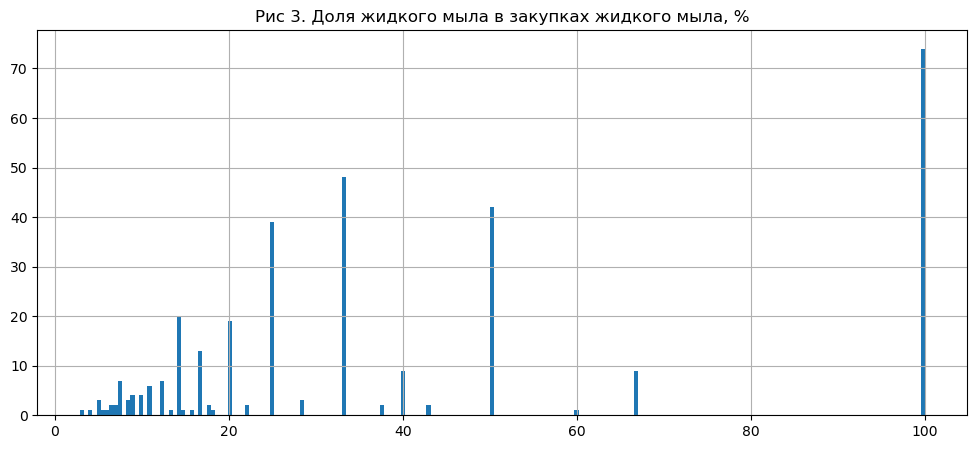

In [234]:
plt.figure(figsize=(12,5))
ok_count_soap['difference'].hist(bins=200)
#plt.xlim(0,15)
#plt.xticks(np.arange(0, 15, step=1))
plt.grid(True)
plt.title('Рис 3. Доля жидкого мыла в закупках жидкого мыла, %')
plt.show()


<div class="alert alert-block alert-success">
    
**Среди всех закупок в которых присутствует жидкое мыло, 70% специализированы только на нём независимо от количества лотов.**
    
</div>
    
---


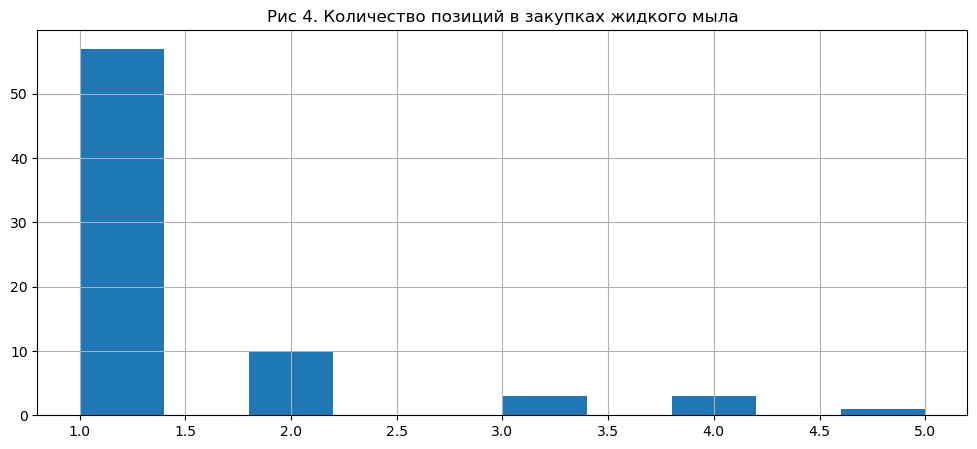

In [243]:
plt.figure(figsize=(12,5))
ok_count_soap[ok_count_soap['difference'] == 100]['total'].hist()
plt.grid(True)
plt.title('Рис 4. Количество позиций в закупках жидкого мыла')
plt.show()

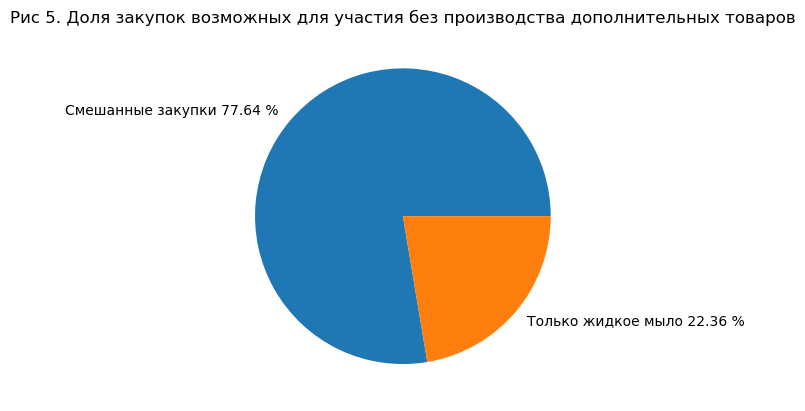

In [244]:
a = ok_count_soap.shape[0]
b = ok_count_soap[ok_count_soap['difference'] == 100]['total'].count()
plt.pie([1 - b / a, b / a], labels=[f'Смешанные закупки {((1 - b / a)*100):.2f} %',
                                    f'Только жидкое мыло {((b / a)*100):.2f} %'])
plt.title('Рис 5. Доля закупок возможных для участия без производства дополнительных товаров')
plt.show()



<div class="alert alert-block alert-success">
    
**Доля закупок, специализирующихся только на жидком мыле составляет 22%. Этот товар часто закупают отдельно. В дальнейшем изучим структуру смешанных закупок, с камим товарами чаще закупают жидкое мыло, какова доля закупок, состоящих из товаров, которые нас интересуют**
    
</div>
    
---

## 3. Изучение требований к закупкам жидкого мыла

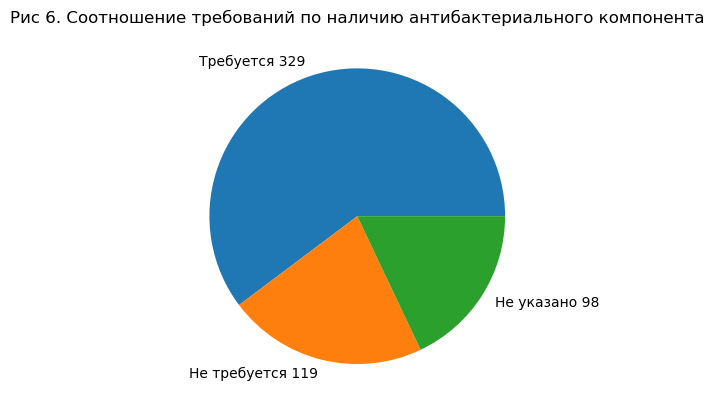

In [264]:
a = data['Антибактериальный компонент'].fillna('не указано').value_counts()

plt.pie(data['Антибактериальный компонент'].fillna('не указано').value_counts(),
       labels=[f'Требуется {a[0]}', f'Не требуется {a[1]}', f'Не указано {a[2]}'])
plt.title('Рис 6. Соотношение требований по наличию антибактериального компонента')
plt.show()


<div class="alert alert-block alert-success">
    
**Диаграмма показывает, что чаще всего закупают антибактериальное жидкое мыло**
    
</div>
    
---

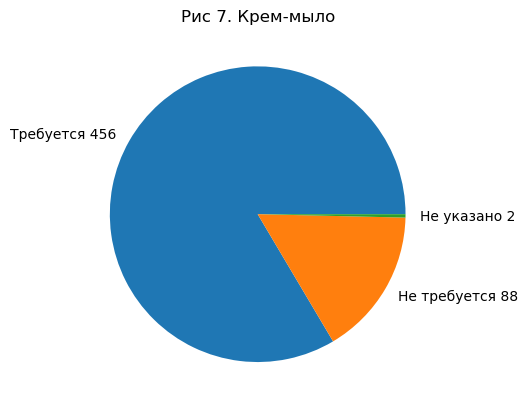

In [263]:
a = data['Смягчающие кожу вв-а, крем-мыло'].fillna('не указано').value_counts()

plt.pie(data['Смягчающие кожу вв-а, крем-мыло'].fillna('не указано').value_counts(),
       labels=[f'Требуется {a[0]}', f'Не требуется {a[1]}', f'Не указано {a[2]}'])
plt.title('Рис 7. Крем-мыло')
plt.show()

<div class="alert alert-block alert-success">
    
**Чаще всего требуется крем-мыло**
    
</div>
    
---

In [354]:
a = data['Тара'].fillna('не указано').value_counts()
a = pd.DataFrame(a).reset_index()

In [355]:
count_list = []
for i in range(len(a['count'])):
    if a['count'][i] < 3:
        count_list.append('прочее')
    else:
        count_list.append(a['Тара'][i])
a['count_list'] = count_list
a = a.drop(columns=['Тара'])
a = a.drop(index=list(range(6, 19)))
a.loc[9] = [20, 'прочее']
a['percentage'] = a['count'] / a['count'].sum(axis=0)* 100

62.2710645198822
16.66666716337204
9.706959873437881
5.677655711770058
1.0989011265337467
0.9157509543001652
3.6630038172006607


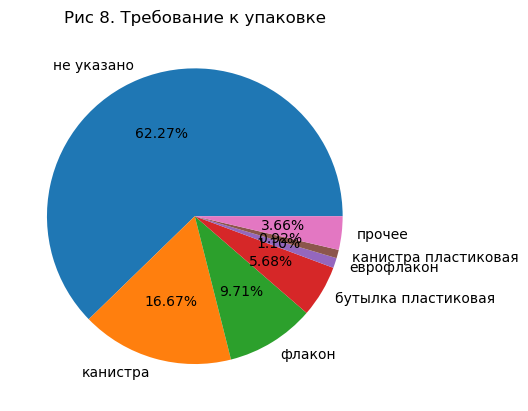

In [376]:
plt.pie(a['count'],
       labels=a['count_list'], autopct=my_fmt)
plt.title('Рис 8. Требование к упаковке')
plt.show()

<div class="alert alert-block alert-success">
    
**Требования к таре часто не указываются, но чаще всего требуют канистру 5л или флакон 500мл.**
    
</div>
    
---

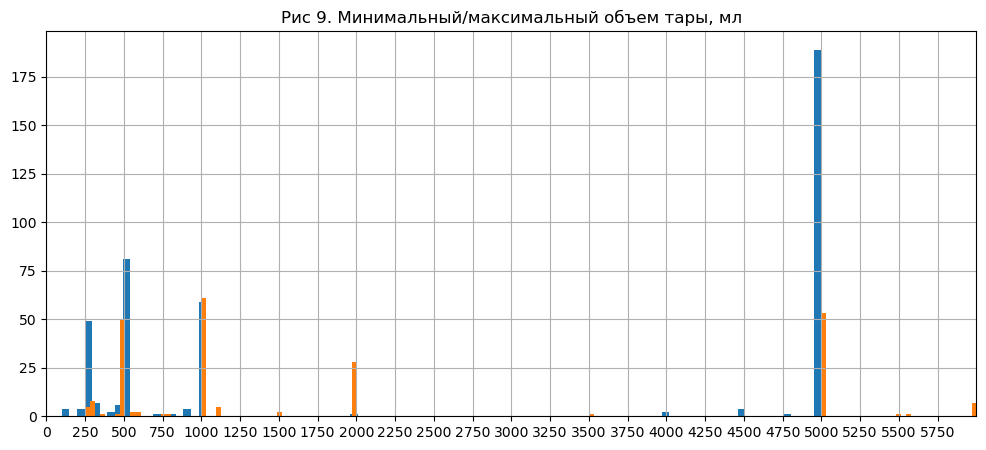

In [443]:
plt.figure(figsize=(12,5))
data['мин'].hist(bins=100)

data['макс'].hist(bins=300)
plt.xlim(0,6000)
#plt.xticks(np.arange(0, 15, step=1))
plt.xticks(np.arange(0, 6000, step=250))
plt.grid(True)
plt.title('Рис 9. Минимальный/максимальный объем тары, мл')
plt.show()

<div class="alert alert-block alert-success">
    
**Наиболее популярны пятилитровые и полулитровые емкости.**
    
</div>
    
---

In [403]:
data['Дозатор'].fillna('не указано').value_counts()

Дозатор
не указано             417
да                     124
пуш пул или дозатор      2
пуш-пул                  2
клапан oneshot           1
Name: count, dtype: int64

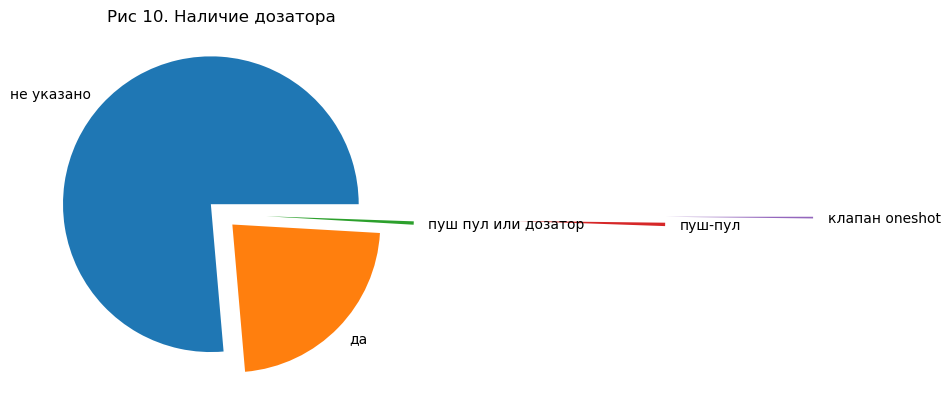

In [433]:

a = data['Дозатор'].fillna('не указано').value_counts()

explode = [0.1, 0.1, 0.3, 2, 3]
plt.pie(data['Дозатор'].fillna('не указано').value_counts(),
       labels=a.index.to_list(), explode=explode)
plt.title('Рис 10. Наличие дозатора')
plt.show()



<div class="alert alert-block alert-success">
    
**На текущий момент, чаще всего мы видим тендеры на жидкое мыло, которое включает в себя:**

    1. Антибактериальный компонент
    2. Смягчающие кожу добавки
    3. Канистра объемом 5л и более
    4. Без дозатора
    
**На втором месте находятся эквивалентные средства, но во флаконах 1л с дозатором.**
    
При дальнейшем пополнении базы данных и работе с ней, репрезентативность исследования возрастет, а также будут сделаны выводы по конкурентам, другим товарам интересующих нас, и требованиям к ним.
    
</div>
    
---
    